In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_total = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Alura-COVID2/main/cases-brazil-states-att.csv")
df_total = df_total[df_total["state"] == "SP"]
df_total = df_total.rename(columns = {"date": "data", "newDeaths": "obitosDiarios"})
df_total.head()

,epi_week,data,country,state,city,obitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [3]:
df_total["data"] = pd.to_datetime(df_total["data"], format = "%Y-%m-%d")
df_total.index = df_total["data"]
df_total.head()

,epi_week,data,country,state,city,obitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
df_total2 = df_total
df_total = df_total[0:300]
df_total.tail()

,epi_week,data,country,state,city,obitosDiarios,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-12-16,51,2020-12-16,Brazil,SP,TOTAL,0,44282,0,1341428,44282,1341428,96.43492,2921.28872,0.03301,1189305.0,NaN,6336829.0,13800.00052
2020-12-17,51,2020-12-17,Brazil,SP,TOTAL,399,44681,20303,1361731,44681,1361731,97.30384,2965.50349,0.03281,1189305.0,NaN,6336829.0,13800.00052
2020-12-18,51,2020-12-18,Brazil,SP,TOTAL,197,44878,9922,1371653,44878,1371653,97.73286,2987.11108,0.03272,1195792.0,NaN,6336829.0,13800.00052
2020-12-19,51,2020-12-19,Brazil,SP,TOTAL,151,45029,12447,1384100,45029,1384100,98.06170,3014.21748,0.03253,1196775.0,NaN,6336829.0,13800.00052
2020-12-20,52,2020-12-20,Brazil,SP,TOTAL,0,45029,0,1384100,45029,1384100,98.06170,3014.21748,0.03253,1205561.0,NaN,6336829.0,13800.00052


In [5]:
y = df_total["obitosDiarios"]
y

data
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2020-12-16      0
2020-12-17    399
2020-12-18    197
2020-12-19    151
2020-12-20      0
Name: obitosDiarios, Length: 300, dtype: int64

In [6]:
import itertools

p = d = q = range(0, 2)
lista_pdq = list(itertools.product(p, d, q))
lista_pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [7]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in lista_pdq]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [8]:
import statsmodels.api as sm

lista_aic = []

for param in lista_pdq:
    for param_seasonal in seasonal_pdq:
        
        mod = sm.tsa.statespace.SARIMAX(
            y,
            order = param,
            seasonal_order = param_seasonal,
            enforce_stationarity = False
        )
        
        results = mod.fit()
        lista_aic.append("ARIMA {} x {} - AIC {}".format(param, param_seasonal, results.aic))

c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\ope

In [9]:
lista_aic

['ARIMA (0, 0, 0) x (0, 0, 0, 7) - AIC 4004.808787901209',
 'ARIMA (0, 0, 0) x (0, 0, 1, 7) - AIC 3667.7730637852533',
 'ARIMA (0, 0, 0) x (0, 1, 0, 7) - AIC 3274.8134548674147',
 'ARIMA (0, 0, 0) x (0, 1, 1, 7) - AIC 3153.482601926876',
 'ARIMA (0, 0, 0) x (1, 0, 0, 7) - AIC 3281.9120586609874',
 'ARIMA (0, 0, 0) x (1, 0, 1, 7) - AIC 3226.354268274522',
 'ARIMA (0, 0, 0) x (1, 1, 0, 7) - AIC 3167.034664064087',
 'ARIMA (0, 0, 0) x (1, 1, 1, 7) - AIC 3153.001678368919',
 'ARIMA (0, 0, 1) x (0, 0, 0, 7) - AIC 3816.550260947689',
 'ARIMA (0, 0, 1) x (0, 0, 1, 7) - AIC 3565.512788526953',
 'ARIMA (0, 0, 1) x (0, 1, 0, 7) - AIC 3265.9496336161346',
 'ARIMA (0, 0, 1) x (0, 1, 1, 7) - AIC 3145.044402808345',
 'ARIMA (0, 0, 1) x (1, 0, 0, 7) - AIC 3283.663031882249',
 'ARIMA (0, 0, 1) x (1, 0, 1, 7) - AIC 3217.954272224145',
 'ARIMA (0, 0, 1) x (1, 1, 0, 7) - AIC 3168.94676906622',
 'ARIMA (0, 0, 1) x (1, 1, 1, 7) - AIC 3144.7355705644263',
 'ARIMA (0, 1, 0) x (0, 0, 0, 7) - AIC 3700.84488547

In [10]:
mod = sm.tsa.statespace.SARIMAX(
    y,
    order = (1, 1, 1),
    seasonal_order = (0, 1, 1, 7),
    enforce_stationarity = False
)

c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


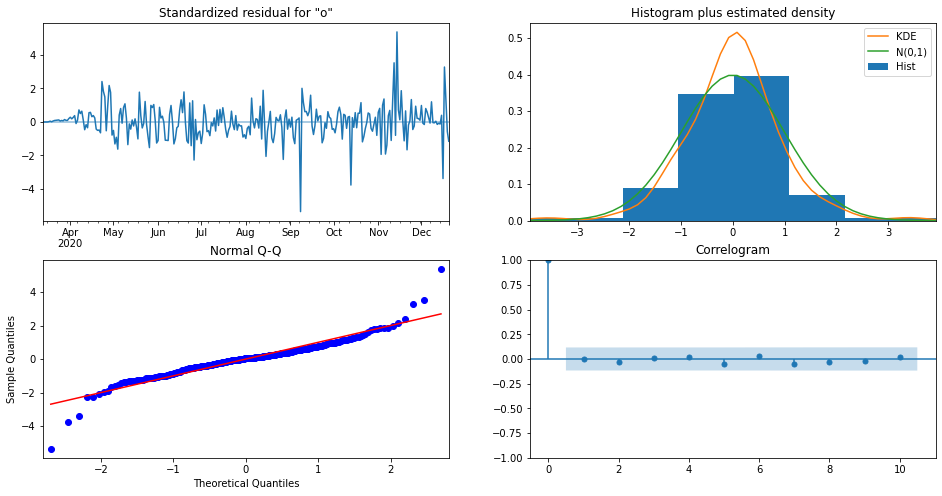

In [11]:
results = mod.fit()
results.plot_diagnostics(figsize = (16, 8))
plt.show()

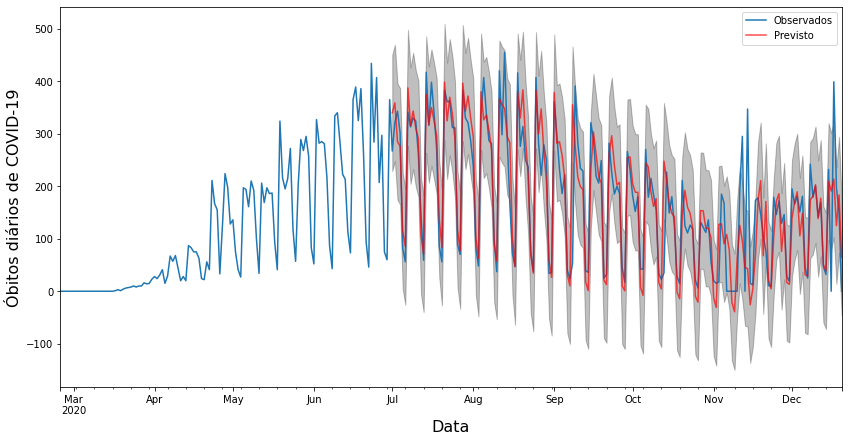

In [12]:
pred = results.get_prediction(start = pd.to_datetime("2020-07-01"), dynamic = False)
pred_ci = pred.conf_int()
ax = y["2020":].plot(label = "Observados")
pred.predicted_mean.plot(ax = ax, label = "Previsto", color = "r", alpha = 0.7, figsize = (14, 7))
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color = "k", alpha = 0.25
)
ax.set_xlabel("Data", fontsize = 16)
ax.set_ylabel("Óbitos diários de COVID-19", fontsize = 16)

plt.legend()
plt.show()

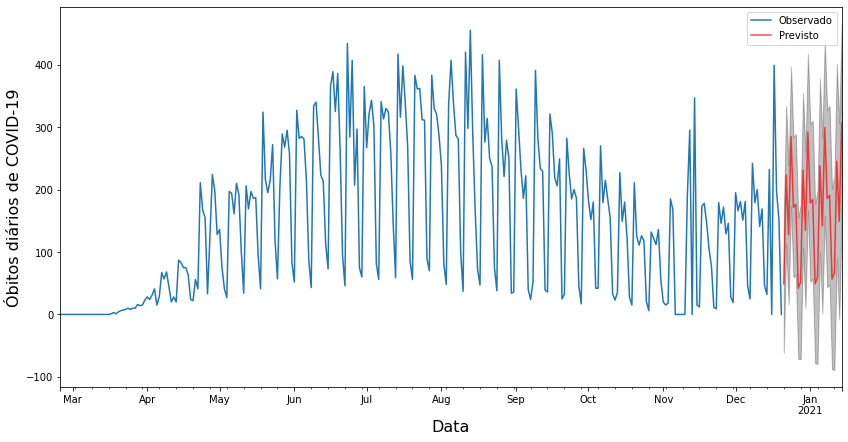

In [13]:
pred = results.get_forecast(steps = 25) 
pred_uc = pred.conf_int()
ax = y.plot(label = "Observado", figsize = (14, 7))
pred.predicted_mean.plot(ax = ax, label = "Previsto", color = "r", alpha = 0.7)
ax.fill_between(
    pred_uc.index,
    pred_uc.iloc[:, 0],
    pred_uc.iloc[:, 1],
    color = "k", alpha = 0.25
)
ax.set_xlabel("Data", fontsize = 16)
ax.set_ylabel("Óbitos diários de COVID-19", fontsize = 16)

plt.legend()
plt.show()

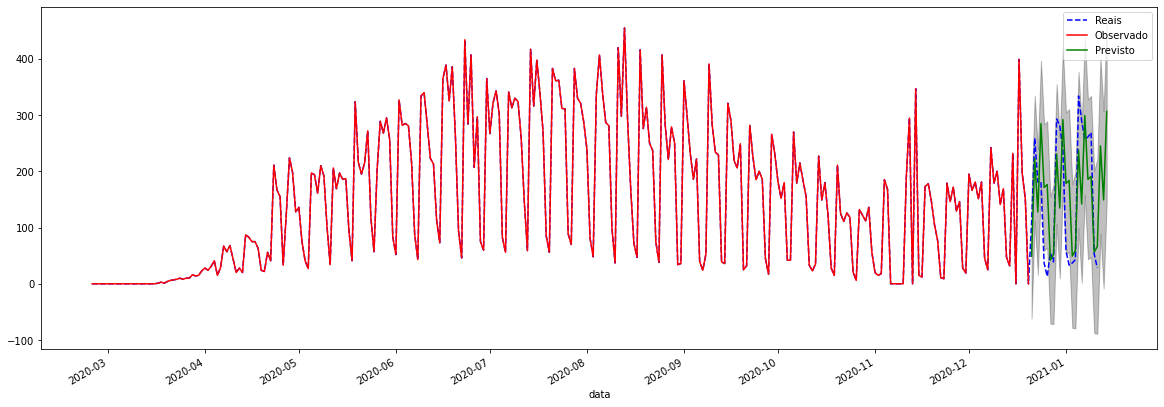

In [14]:
x = df_total2["obitosDiarios"]

plt.figure(figsize = (20, 7))
fig = plt.plot(x, linestyle = "--", color = "b", label = "Reais")

ax = y.plot(label = "Observado", color = "r")
ax.fill_between(
    pred_uc.index,
    pred_uc.iloc[:, 0],
    pred_uc.iloc[:, 1],
    color = "k", alpha = 0.25
)

pred.predicted_mean.plot(ax = ax, color = "g", label = "Previsto")

plt.legend()
plt.show()